In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('Video_Games.csv')

print(df.head())

   index                      Name Platform  Year_of_Release         Genre  \
0      0                Wii Sports      Wii           2006.0        Sports   
1      1         Super Mario Bros.      NES           1985.0      Platform   
2      2            Mario Kart Wii      Wii           2008.0        Racing   
3      3         Wii Sports Resort      Wii           2009.0        Sports   
4      4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   

  Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  \
0  Nintendo     41.36     28.96      3.77         8.45         82.53   
1  Nintendo     29.08      3.58      6.81         0.77         40.24   
2  Nintendo     15.68     12.76      3.79         3.29         35.52   
3  Nintendo     15.61     10.93      3.28         2.95         32.77   
4  Nintendo     11.27      8.89     10.22         1.00         31.37   

   Critic_Score  Critic_Count User_Score  User_Count Developer Rating  
0          76.0          5

In [53]:
df.isna().sum()

index                 0
Name                  2
Platform              0
Year_of_Release     273
Genre                 2
Publisher            55
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8668
Critic_Count       8668
User_Score         6769
User_Count         9210
Developer          6688
Rating             6836
dtype: int64

In [54]:
# Drop columns with too many missing values
columns_to_drop = ['Critic_Score', 'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating']
df = df.drop(columns=columns_to_drop)

In [55]:
df.head()

,index,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53
1,1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52
3,3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77
4,4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [56]:
# Drop rows with missing values
df = df.dropna(subset=['Name', 'Year_of_Release', 'Genre', 'Publisher'])
len(df)

16620

In [57]:
df.isna().sum()

index              0
Name               0
Platform           0
Year_of_Release    0
Genre              0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
dtype: int64

In [58]:
# Create the target variable ("hit" vs. "not a hit")
df['Is_Hit'] = (df['Global_Sales'] >= 1.0).astype(int)

# Check the distribution (how many hits vs non-hits)
print("Hit Distribution")
print(df['Is_Hit'].value_counts(normalize=True))
df.head()

Hit Distribution
Is_Hit
0    0.875632
1    0.124368
Name: proportion, dtype: float64


,index,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Is_Hit
0,0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,1
1,1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,1
2,2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,1
3,3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,1
4,4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,1


C:\Users\kyler\AppData\Local\Temp\ipykernel_24024\3446794272.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_sales.index, y=genre_sales.values, palette='viridis')


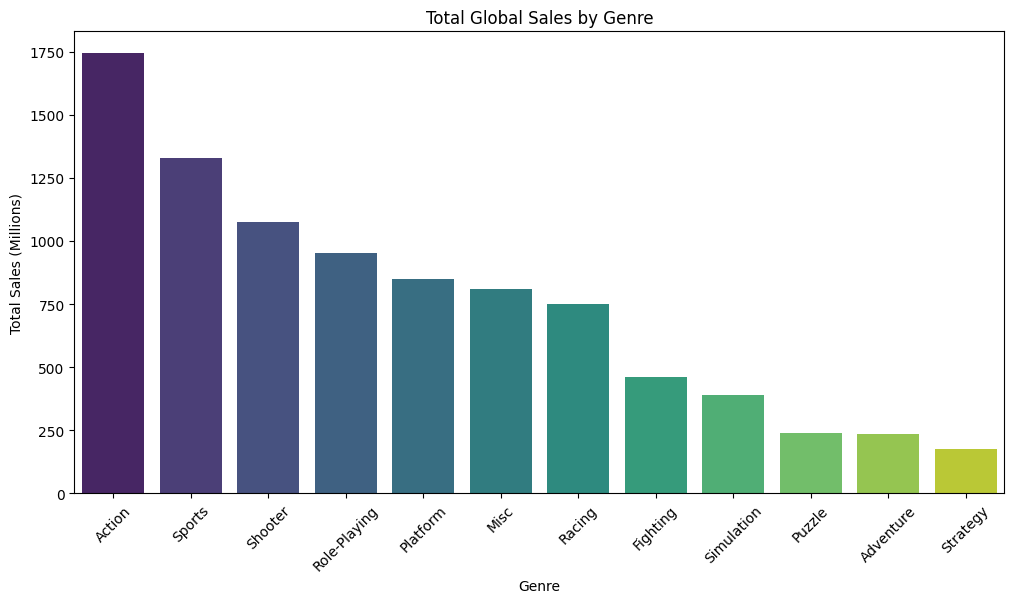

In [59]:
# Group by Genre and sum the Global Sales
genre_sales = df.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)

# Create bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_sales.index, y=genre_sales.values, palette='viridis')
plt.title('Total Global Sales by Genre')
plt.ylabel('Total Sales (Millions)')
plt.xticks(rotation=45)
plt.show()

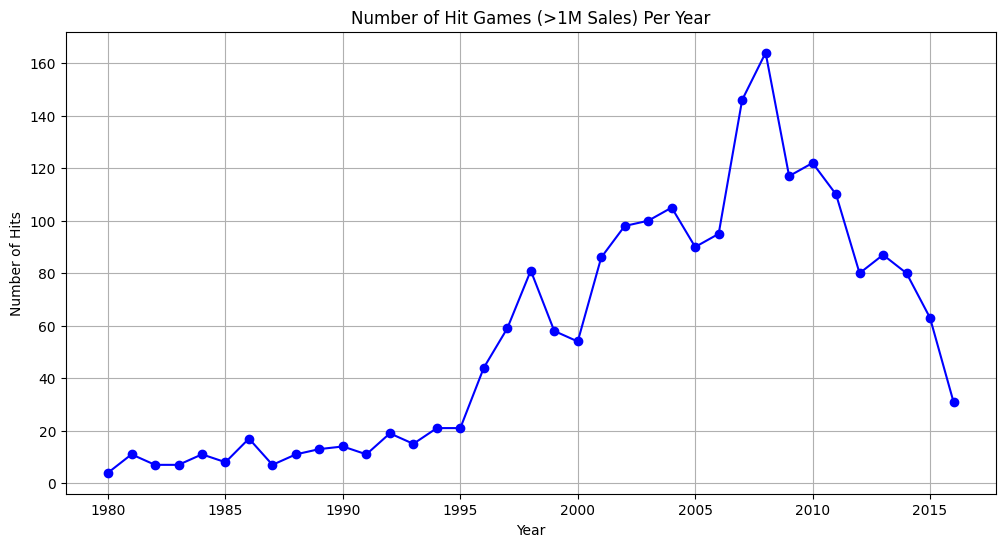

In [60]:
# Group by Year and count the number of hits
hits_per_year = df[df['Is_Hit'] == 1].groupby('Year_of_Release').size()

# Create a line chart
plt.figure(figsize=(12, 6))
plt.plot(hits_per_year.index, hits_per_year.values, marker='o', linestyle='-', color='b')
plt.title('Number of Hit Games (>1M Sales) Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Hits')
plt.grid(True)
plt.show()

C:\Users\kyler\AppData\Local\Temp\ipykernel_24024\1663743809.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=platform_hit_rate.index, y=platform_hit_rate.values * 100, palette='coolwarm')


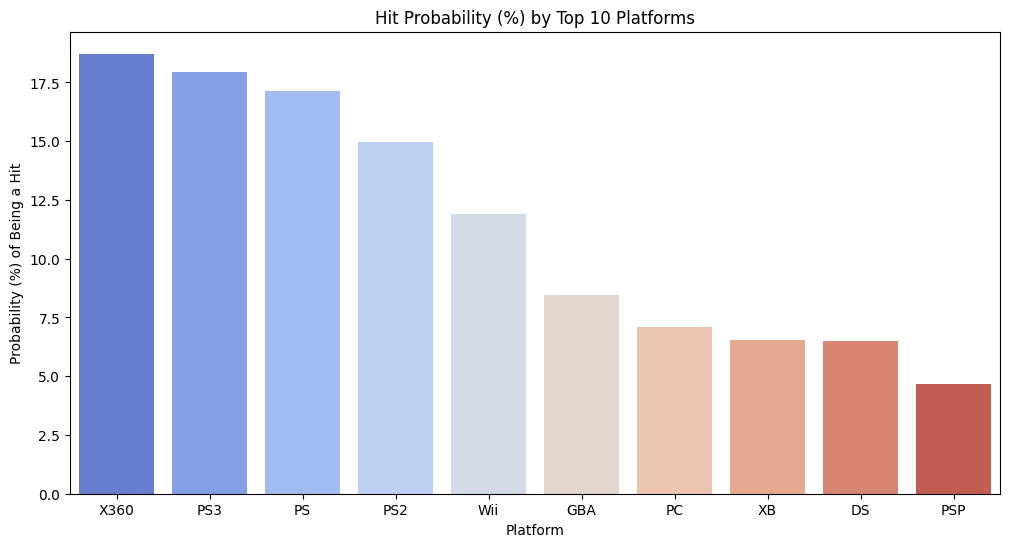

In [61]:
# Identify the top 10 platforms by total number of games
top_platforms = df['Platform'].value_counts().nlargest(10).index

# Filter the data to only include these top 10 platforms
df_top_platforms = df[df['Platform'].isin(top_platforms)]

# Calculate hit rate (mean of 'Is_Hit') for each platform
platform_hit_rate = df_top_platforms.groupby('Platform')['Is_Hit'].mean().sort_values(ascending=False)

# Create a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=platform_hit_rate.index, y=platform_hit_rate.values * 100, palette='coolwarm')
plt.title('Hit Probability (%) by Top 10 Platforms')
plt.ylabel('Probability (%) of Being a Hit')
plt.xlabel('Platform')
plt.show();

C:\Users\kyler\AppData\Local\Temp\ipykernel_24024\3757781159.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=publisher_hit_rate.values, y=publisher_hit_rate.index, palette='plasma')


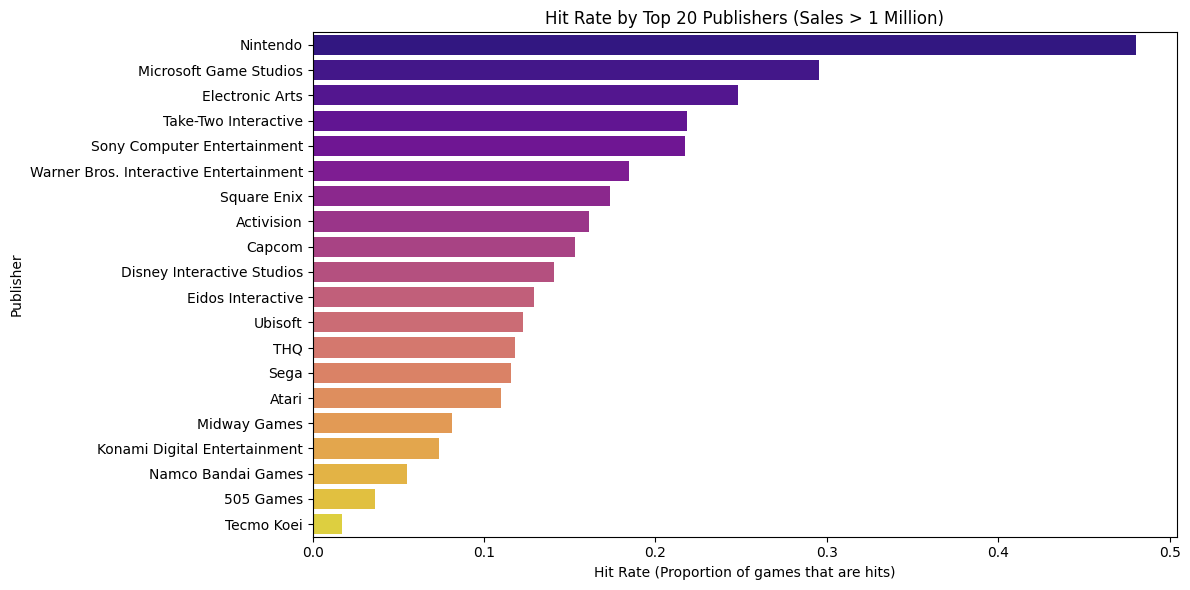

In [62]:
# Identify Top 20 publishers by count
top_20_publishers = df['Publisher'].value_counts().nlargest(20).index

# Filter data for just top publishers
df_top_publishers = df[df['Publisher'].isin(top_20_publishers)]

# Calculate hit rate (mean of Is_Hit) for publishers
publisher_hit_rate = df_top_publishers.groupby('Publisher')['Is_Hit'].mean().sort_values(ascending=False)

# Plot bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=publisher_hit_rate.values, y=publisher_hit_rate.index, palette='plasma')
plt.title('Hit Rate by Top 20 Publishers (Sales > 1 Million)')
plt.xlabel('Hit Rate (Proportion of games that are hits)')
plt.ylabel('Publisher')
plt.tight_layout()
plt.show()

In [63]:
df.head()

,index,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Is_Hit
0,0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,1
1,1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,1
2,2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,1
3,3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,1
4,4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,1


In [64]:
# With publisher type being a major indicator of a game being a hit (due to brand loyalty), we will split the publishers into Top Publishers (Top 20 publishers with highest hit rates)
# and unknown publishers (everyone else)

top_20_publishers = df['Publisher'].value_counts().nlargest(20).index.tolist()

df['Publisher_Type'] = df['Publisher'].apply(
    lambda x: 'Top' if x in top_20_publishers else 'Unknown'
)

In [65]:
df.head()

,index,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Is_Hit,Publisher_Type
0,0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,1,Top
1,1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,1,Top
2,2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,1,Top
3,3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,1,Top
4,4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,1,Top


Accuracy: 85.89%

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.95      0.92      2911
           1       0.37      0.20      0.26       413

    accuracy                           0.86      3324
   macro avg       0.63      0.57      0.59      3324
weighted avg       0.83      0.86      0.84      3324



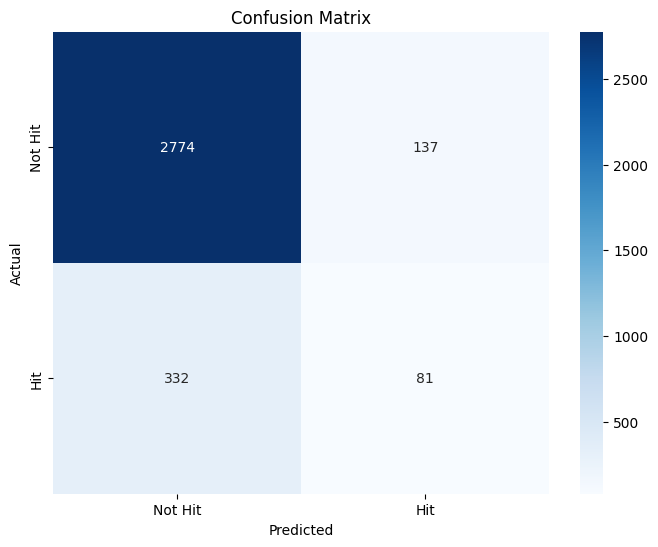

In [97]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import seaborn as sns
import matplotlib.pyplot as plt

# Exclude all sales columns, 
# exclude Name and Year_of_Release (not relevant), 
# exclude Publisher column since we are splitting this data into another column, 
# and exclude index and target columns

# Identify categorical columns to encode
categorical_features = ['Platform', 'Genre', 'Publisher_Type']

# Create transformer to one hot encode categorical data
preprocessor = ColumnTransformer(transformers=[('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)], remainder='passthrough')

# Create the classifier and pipeline
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=200, max_depth=20, max_features='log2', min_samples_split=10, class_weight={0: 1, 1: 3}, random_state=42))
])

# Define X & y
X = df[categorical_features]
y = df['Is_Hit']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train the model
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

# Evaluate
y_pred = clf.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Create Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Hit', 'Hit'], yticklabels=['Not Hit', 'Hit'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show();

In [71]:
X.head()

,Platform,Genre,Publisher_Type
0,Wii,Sports,Top
1,NES,Platform,Top
2,Wii,Racing,Top
3,Wii,Sports,Top
4,GB,Role-Playing,Top


In [72]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Is_Hit, dtype: int64

In [95]:
# Evaluate the model with cross validation while tuning model's hyperparameters

from sklearn.model_selection import StratifiedKFold, cross_validate
import numpy as np

dropped_cols = ['index', 'Name', 'Year_of_Release', 'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Is_Hit']

X = df.drop(columns=dropped_cols)
y = df['Is_Hit']

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scoring_metrics = ['accuracy', 'f1']
cv_results = cross_validate(clf, X, y, cv=cv, scoring=scoring_metrics)

print(f"Mean CV Accuracy: {np.mean(cv_results['test_accuracy']):.4f}")
print(f"Mean CV F1-Score: {np.mean(cv_results['test_f1']):.4f}")


Mean CV Accuracy: 0.8428
Mean CV F1-Score: 0.3174


In [96]:
# Use GridSearch to find best parameters for current model
from sklearn.model_selection import GridSearchCV

param_grid = {
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5, 10, 20],
    'classifier__n_estimators': [100, 200, 500],
    'classifier__max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='f1', n_jobs =-1)

grid_search.fit(X, y)

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best CV F1-Score: {grid_search.best_score_:.4f}")

best_model = grid_search.best_estimator_

Best Parameters: {'classifier__max_depth': None, 'classifier__max_features': 'log2', 'classifier__min_samples_split': 20, 'classifier__n_estimators': 200}
Best CV F1-Score: 0.3002


In [98]:
import numpy as np
from sklearn.metrics import f1_score

# 1. Train the model on the full training set
clf.fit(X_train, y_train)

# 2. Predict probabilities
y_probs = clf.predict_proba(X_test)[:, 1] # Probability of being a hit

# 3. Test different thresholds to find the best F1-Score
thresholds = np.arange(0.1, 0.9, 0.01)
best_f1 = 0
best_threshold = 0.5

for threshold in thresholds:
    y_pred_threshold = (y_probs >= threshold).astype(int)
    current_f1 = f1_score(y_test, y_pred_threshold)
    if current_f1 > best_f1:
        best_f1 = current_f1
        best_threshold = threshold

print(f"Best Threshold: {best_threshold:.2f}")
print(f"Best F1-Score with Threshold: {best_f1:.4f}")

# 4. Final Classification Report with new threshold
y_pred_final = (y_probs >= best_threshold).astype(int)
print("\nFinal Classification Report:\n", classification_report(y_test, y_pred_final))

Best Threshold: 0.35
Best F1-Score with Threshold: 0.3540

Final Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.72      0.81      2911
           1       0.24      0.64      0.35       413

    accuracy                           0.71      3324
   macro avg       0.59      0.68      0.58      3324
weighted avg       0.85      0.71      0.75      3324



In [100]:
# Save the model
import joblib

joblib.dump(clf, 'video_game_prediction_model.pkl')

['video_game_prediction_model.pkl']